In [1]:
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis = 1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [3]:
pre_y = df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0))
#pre_X

In [4]:
smote = SMOTE(sampling_strategy ='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

['scaler_model']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [6]:
classifier = Sequential()
classifier.add(Dense(400, activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(800, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9040


[0.22602392733097076, 0.903954803943634]

In [7]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

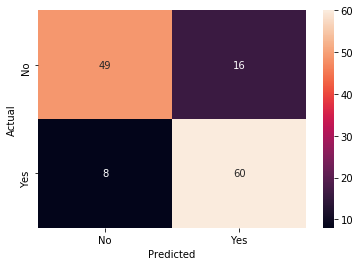

In [9]:
cn = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cn, annot= True, ax = ax)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No','Yes'])

In [9]:
# save models
import joblib
joblib.dump(sc, ".\Model\scaler_model")
classifier.save('.\Model\loan_model.h5')

In [ ]:
# load model
#from keras import models
#new = models.load_model('.\Model\loan_model.h5')